In [41]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [42]:
# Files to load
client_data_to_load = "../files/Current_Clients.csv"
leads_data_to_load = "../files/leads.csv"

In [43]:
# Read in the files
client_data_df = pd.read_csv(client_data_to_load)
leads_data_df = pd.read_csv(leads_data_to_load)

In [44]:
# Examine client_data_df and look for null values
client_data_df.isnull().sum()

Client ID     0
First Name    0
Last Name     0
City          0
State         0
ZIP           0
dtype: int64

In [45]:
# Examine leads_data_df and look for null values
leads_data_df.isnull().sum()

first_name     0
last_name      0
age           25
gender        25
debt          14
city           0
state          0
zip            0
dtype: int64

In [46]:
# Cast null values as zero for further analysis
leads_data_df['debt'] = leads_data_df['debt'].fillna(0)


In [47]:
leads_data_df.isnull().sum()

first_name     0
last_name      0
age           25
gender        25
debt           0
city           0
state          0
zip            0
dtype: int64

In [48]:
leads_data_df.sample(10)

,first_name,last_name,age,gender,debt,city,state,zip
62,Shae,Casement,82.0,Male,"$16,180",Flushing,NY,11388
431,Gard,Cuchey,80.0,Male,"$12,981",Cincinnati,OH,45233
934,Ola,McKeney,20.0,Female,"$93,561",Sacramento,CA,94273
813,Brod,Dowsey,51.0,Male,"$103,941",Las Cruces,NM,88006
184,Loy,Kernar,47.0,Male,"$55,942",Norfolk,VA,23509
506,Dulcie,Virgoe,30.0,Female,"$83,245",Saint Paul,MN,55108
735,Darrin,Andreichik,66.0,Male,"$55,995",Lubbock,TX,79415
660,Archy,Fardy,96.0,Male,"$93,912",Dallas,TX,75226
612,Erin,Aleavy,25.0,Female,"$89,675",Lake Charles,LA,70616
652,Dolf,Petranek,83.0,Male,"$28,851",Tulsa,OK,74193


In [49]:
client_data_df.head(10)

,Client ID,First Name,Last Name,City,State,ZIP
0,1,Vincenty,Vanyard,Hollywood,FL,33028
1,2,Pattie,Okeshott,Scottsdale,AZ,85271
2,3,Olenka,Blackler,Phoenix,AZ,85020
3,4,Georgia,Elby,Virginia Beach,VA,23454
4,5,Sheelah,Petris,Cleveland,OH,44111
5,6,Dorree,Nunan,Salt Lake City,UT,84115
6,7,Rodina,De Giovanni,Vero Beach,FL,32964
7,8,Sibbie,Lorman,Salt Lake City,UT,84170
8,9,Falito,Dymott,Macon,GA,31217
9,10,Kin,Rydeard,Saint Paul,MN,55115


In [50]:
# Drop extra column and reassign Client ID as index
client_data_df.set_index('Client ID', inplace=True)
client_data_df


,First Name,Last Name,City,State,ZIP
Client ID,,,,,
1,Vincenty,Vanyard,Hollywood,FL,33028
2,Pattie,Okeshott,Scottsdale,AZ,85271
3,Olenka,Blackler,Phoenix,AZ,85020
4,Georgia,Elby,Virginia Beach,VA,23454
5,Sheelah,Petris,Cleveland,OH,44111
...,...,...,...,...,...
176,Crystal,Ratley,Henderson,NV,89074
177,Talbot,McTerry,San Bernardino,CA,92415
178,Granger,Goudard,London,KY,40745


In [11]:
# Check data types 
leads_data_df.dtypes

first_name     object
last_name      object
age           float64
gender         object
debt           object
city           object
state          object
zip             int64
dtype: object

In [12]:
# Check data types 
client_data_df.dtypes

First Name    object
Last Name     object
City          object
State         object
ZIP            int64
dtype: object

In [13]:
# Use regex to ged rid of $ in the debt column
leads_data_df['debt'] = leads_data_df['debt'].replace({'\$': '', ',': ''}, regex=True)
leads_data_df

,first_name,last_name,age,gender,debt,city,state,zip
0,Terrye,Gunnell,60.0,Female,101876,Springfield,MA,1152
1,Rodolph,Gerb,47.0,Male,92052,Worcester,MA,1605
2,Glynis,D'orsay,56.0,Female,72343,Worcester,MA,1654
3,Alvie,Vennart,73.0,Male,76304,Woburn,MA,1813
4,Brantley,Chalker,87.0,Male,22570,Boston,MA,2114
...,...,...,...,...,...,...,...,...
995,Sigrid,Clevely,39.0,Female,0,Spokane,WA,99215
996,Hank,Effnert,62.0,Male,89054,Spokane,WA,99215
997,Harley,Lodder,37.0,Male,100941,Spokane,WA,99252
998,Mose,Warwick,88.0,Male,33860,Anchorage,AK,99507


In [14]:
# convert column "debt" to int64 dtype 
leads_data_df.debt = leads_data_df.debt.astype('int64')


In [15]:
# Group leads by gender
gender_data = leads_data_df.groupby('gender')['gender'].count()
gender_data

gender
Female    477
Male      498
Name: gender, dtype: int64

In [16]:
leads_gender = leads_data_df['gender']
def sex_counter(leads_gender):
    male = 0
    female = 0

    for i in leads_gender:
        if i == 'Female':
            female += 1
        elif i == 'Male':
            male += 1
            
    return male,female
    

In [17]:
sex_counter(leads_gender)

(498, 477)

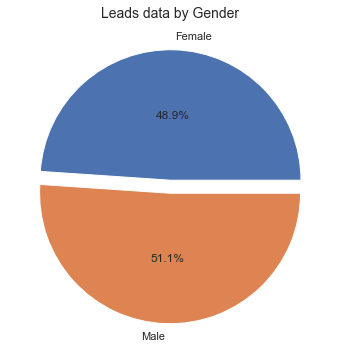

In [51]:
# Plot leads by gender using matplotlib
pie, ax = plt.subplots(figsize=[9,6])
labels = gender_data.keys()
plt.pie(x=gender_data, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Leads data by Gender", fontsize=14)
pie.savefig("DataByGenderPieChart.png")

In [19]:
# Group leads by State 
state_data = leads_data_df.groupby('state')['state'].count()
state_data

state
AK      2
AL     24
AR      3
AZ     17
CA    112
CO     25
CT     13
DC     34
DE      1
FL     69
GA     27
HI      4
IA      9
ID      4
IL     29
IN     19
KS     18
KY     13
LA     20
MA     15
MD     10
MI     18
MN     19
MO     21
MS      4
NC     29
ND      2
NE      7
NJ     10
NM      9
NV     24
NY     50
OH     45
OK     27
OR      9
PA     30
SC      9
SD      3
TN     26
TX     97
UT     14
VA     27
VT      1
WA     27
WI     14
WV      7
WY      3
Name: state, dtype: int64

In [20]:
# Top 10 states 
state_data_sorted = state_data.sort_values(ascending=False)
state_data_sorted

state
CA    112
TX     97
FL     69
NY     50
OH     45
DC     34
PA     30
IL     29
NC     29
GA     27
VA     27
WA     27
OK     27
TN     26
CO     25
AL     24
NV     24
MO     21
LA     20
MN     19
IN     19
MI     18
KS     18
AZ     17
MA     15
UT     14
WI     14
KY     13
CT     13
MD     10
NJ     10
IA      9
OR      9
SC      9
NM      9
NE      7
WV      7
ID      4
HI      4
MS      4
WY      3
SD      3
AR      3
ND      2
AK      2
VT      1
DE      1
Name: state, dtype: int64

In [21]:
state_top_data = state_data_sorted[:10]
state_top_data

state
CA    112
TX     97
FL     69
NY     50
OH     45
DC     34
PA     30
IL     29
NC     29
GA     27
Name: state, dtype: int64

In [22]:
state_top_data.keys()

Index(['CA', 'TX', 'FL', 'NY', 'OH', 'DC', 'PA', 'IL', 'NC', 'GA'], dtype='object', name='state')

In [23]:
# As we don’t have the autopct option available in Seaborn, we’ll need to calculate the percentage column for the top 10 states.
total_count = state_data.sum()
state_pcts = round((state_top_data / total_count * 100),2)
state_pcts

state
CA    11.2
TX     9.7
FL     6.9
NY     5.0
OH     4.5
DC     3.4
PA     3.0
IL     2.9
NC     2.9
GA     2.7
Name: state, dtype: float64

/Users/josemonagas/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


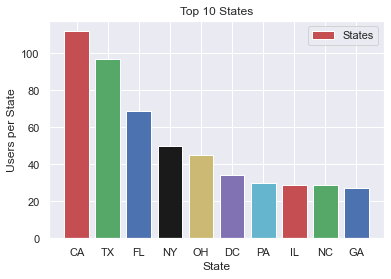

In [52]:
# Plot state data 
my_colors = 'rgbkymc'
plt.bar(state_top_data.keys(), state_top_data, color=my_colors, label='States')
# Create labels for the x and y axes.
plt.xlabel("State")
plt.ylabel("Users per State")
# Create a title.
plt.title("Top 10 States")
# Save the plot 
plt.savefig('Top10states.png',dpi=400)
# Add the legend.
plt.legend()

In [25]:
# Debt by gender  
debt_data_by_gender = leads_data_df.groupby('gender')['debt'].sum()
debt_data_by_gender

gender
Female    29027030
Male      30133392
Name: debt, dtype: int64

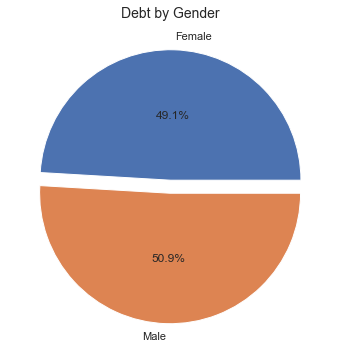

In [30]:
# Plot debt by gender using matplotlib
pie, ax = plt.subplots(figsize=[9,6])
labels = debt_data_by_gender.keys()
plt.pie(x=debt_data_by_gender, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Debt by Gender", fontsize=14)
pie.savefig("DebtByGenderPieChart.png")

In [34]:
# Debt by State 
debt_data_by_state = leads_data_df.groupby('state')['debt'].sum()
debt_data_by_state.sort_values(ascending=False)

state
CA    7501022
TX    5779456
FL    4027190
NY    2922371
OH    2715174
DC    1970957
PA    1948023
IL    1886997
NC    1657781
NV    1567767
CO    1553721
WA    1547235
VA    1501417
OK    1432157
GA    1427445
AL    1402398
IN    1336082
TN    1317415
MO    1247947
MN    1206535
LA    1197959
KS    1175690
MI    1150598
AZ    1094498
MA    1065590
UT     871965
KY     804099
WI     783158
CT     724602
NJ     717401
OR     593405
MD     592403
SC     574229
IA     521395
NM     498899
NE     375410
MS     328526
WV     323445
ID     239170
WY     215054
AR     192056
HI     153290
SD     122036
ND     115192
VT     106464
DE     104339
AK      96174
Name: debt, dtype: int64

In [38]:
# Debt by Age
debt_data_by_age = leads_data_df.groupby('age')['debt'].sum()
debt_data_by_age = debt_data_by_age.sort_values(ascending=False)
debt_data_by_age.head(20)

age
96.0     1273497
56.0     1243131
91.0     1235080
76.0     1224085
47.0     1212657
31.0     1096796
65.0     1060824
46.0     1050264
72.0     1032304
62.0     1026785
52.0     1016814
37.0      964819
81.0      960250
35.0      957572
94.0      947922
34.0      946975
100.0     941787
24.0      941647
28.0      930060
39.0      929018
Name: debt, dtype: int64

In [39]:
debt_data_by_age = leads_data_df.groupby('age')['debt'].count()
debt_data_by_age = debt_data_by_age.sort_values(ascending=False)
debt_data_by_age.head(20)

age
99.0     18
96.0     18
91.0     18
47.0     18
62.0     18
56.0     18
76.0     17
39.0     17
31.0     17
52.0     17
81.0     16
28.0     16
65.0     16
35.0     16
60.0     15
50.0     15
72.0     15
83.0     15
46.0     15
100.0    15
Name: debt, dtype: int64

In [ ]:

for i in client_data_df